# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


In this notebook we introduce and apply the **Metropolis algorithm**, a Markov Chain Monte Carlo method, to the sampling of quantum probability distributions.  
We first present the theoretical background of the algorithm, highlighting its ergodic and regular properties.  
Then we recall the essential aspects of quantum mechanics for the hydrogen atom, focusing on the probability densities of the $1s$ and $2p$ orbitals.  
Finally, we apply the Metropolis algorithm to sample these wavefunctions in Cartesian coordinates, analyze the convergence of the observables using the blocking method, and compare the results obtained with **uniform** and **Gaussian** transition probabilities.  


This notebook is organized in three section:

1. [The Metropolis Algorithm](#1-the-metropolis-algorithm)  
2. [Quantum mechanics and the hydrogen atom](#2-quantum-mechanics-and-the-hydrogen-atom)  
3. [Metropolis sampling of hydrogenic wavefunctions](#3-metropolis-sampling-of-hydrogenic-wavefunctions)



# 1. The Metropolis Algorithm

The Metropolis algorithm, first introduced by Metropolis, Rosenbluth, Rosenbluth, Teller and Teller, is an advanced sampling technique belonging to the family of Markov Chain Monte Carlo (MCMC) methods. Its purpose is to generate a Markov process whose invariant distribution coincides with a target probability density $p(x)$, thereby enabling the sampling of $p(x)$ without requiring its normalization.

Let $\{x_n\}_{n\geq 0}$ denote the Markov chain generated by the stochastic kernel $K(x|y)$.  
If $d_0(x)$ is the distribution of the initial state $x_0$, then the distribution of $x_n$ is denoted by $d_n(x)$ and evolves according to

$$
d_{n+1}(x) = \int K(x|y)\, d_n(y)\, dy.
$$

A probability distribution $p(x)$ is said to be *invariant* with respect to $K$ if

$$
p(x) = \int K(x|y)\, p(y)\, dy.
$$

The central objective is to ensure that, independently of the initial distribution $d_0(x)$, the sequence $\{d_n(x)\}$ converges to $p(x)$ as $n \to \infty$:

$$
\lim_{n \to \infty} d_n(x) = p(x).
$$

To guarantee this convergence, some properties of the kernel are required:

- **Ergodic kernel**: A stochastic kernel $K(x|y)$ is *ergodic* if and only if one strictly positive probability density $p(x)$ exists such that  

  $$
  p(x) = \lim_{n \to \infty} d_n(x) 
       = \lim_{n \to \infty} \int K(x|y)\, d_n(y)\, dy,
       \qquad \forall\, d_0(x).
  $$

- **Regular kernel**: A stochastic kernel $K(x|y)$ is *regular* if and only if it gives rise to a sequence of equi-continuous probability densities $d_n(x)$ when $d_0(x)$ is uniformly continuous.  
  In simple words: the probability distribution $d_n$ “remains good” if the starting distribution is “good” and if the kernel $K(x|y)$ is regular.

**Theorem**  
A nucleus $K(x|y)$ strictly positive and regular is ergodic if and only if it has an invariant strictly positive probability density $p(x)$. 

If we find a regular transition probability $K(x|y)$ such that the probability distribution $p(x)$ (that we wish to sample) is invariant for $K$, i.e.  

$$
p(x) = \int K(x|y)\,p(y)\,dy,
$$

then the previous theorem guarantees us that  

$$
p(x) = \lim_{n \to \infty} d_{n+1}(x) 
      = \lim_{n \to \infty} \int K(x|y)\, d_n(y)\,dy,
      \qquad \forall\, d_0(x).
$$

Therefore, the idea which underlies the M(RT)$^2$ algorithm is to find one (there could be infinite… but one is enough!) particular and regular transition probability in order to exploit the properties of stationary Markov processes and sample the desired probability distribution.

Since solving the invariance condition directly is difficult, the Metropolis prescription imposes the stronger *detailed balance* condition:

$$
K(x|y)\,p(y) = K(y|x)\,p(x).
$$

The detailed balance implies the previous integral equation. 
In practice, the kernel is decomposed into two factors:

$$
K(x|y) = T(x|y)\, A(x|y),
$$

where $T(x|y)$ is a trial transition probability (proposal distribution) and $A(x|y)$ is the acceptance probability. 

Given $T(x|y)$ one possible choice of $A(x|y)$ is the metropolis choice:

$$

A(x|y) = \min \left( 1, q(x|y) \right)

\quad
where 
\quad
q(x|y)= \frac{T(y|x)\,p(x)}{T(x|y)\,p(y)}\geq 0 
$$

For symmetric proposals, $T(x|y)=T(y|x)$, this reduces to

$$
A(x|y) = \min \left( 1, \frac{p(x)}{p(y)} \right).
$$

It's easy to show that this choice fullfiled the detailed balance, and is valid for any "good" transition probability.
The efficiency of the method depends on the choice of $T(x|y)$, and a widely used empirical rule is to tune the parameters of the proposal distribution such that the acceptance ratio is approximately $50\%$. THis empirical rule ensuring a good compromise between the exploration of the configuration space and the correlation among successive samples.



The M(RT)2 algorithm is of very great simplicity and power, it can be used to sample essentially any density function regardless of analytic complexity in any number of dimensions.
Complementary disadvantages are that sampling is correct only asymptotically and that successive variables produced are correlated,
often very strongly. This means that the evaluation of integrals normally produces positive correlations in the values of the integrand with consequent increase in variance for a fixed number of steps as compared with independent samples.

**How M(RT)$^2$ works?**

Let $p(x)$ be the probability we wish to sample;  
a random walk of values $x_n$ will be generated that,  
for the properties of the transition probability $K = T \cdot A$,  
are distributed with probability $d_n(x)$ such that $d_n(x) \to p(x)$:

**Step n:**
- $x = x_n$
- Generate $x'$ from $T(x'|x_n)$
- Evaluate 
  $$
  A(x'|x_n) = \min \left\{ 1, \frac{T(x_n|x')\,p(x')}{T(x'|x_n)\,p(x_n)} \right\} = \alpha
  $$
- Accept with probability $\alpha$ the move $x_n \to x'$  
  $r \in [0,1]$ uniform random number  
  if $r \leq \alpha$ accept: $x_{n+1} = x'$  
  else reject: $x_{n+1} = x_n$
- repeat

This algorithmic scheme has been implemented in the following simulations, where it is applied to sample the probability densities of the hydrogen atom wavefunctions.


# 2. Quantum mechanics and the hydrogen atom

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$





In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def plot_transient():
    no_burnin =np.loadtxt("transiente/r_0.dat")
    burnin =np.loadtxt("transiente/r_10.dat")
    big_burnin=np.loadtxt("transiente/r_20.dat")
    plt.figure(figsize=(10,6))
    x=np.arange(1000)
    plt.plot(x,no_burnin[:1000],label=r'$|\vec{x_0}|=0$')
    plt.plot(x,burnin[:1000],label=r'$|\vec{x_0}|=10$')
    plt.plot(x, big_burnin[:1000],label=r'$|\vec{x_0}|=20$')

    plt.axhline(y=1.5, color='red', linestyle='--', label=r'$ <r>_{theoric}$')
    plt.legend()
    plt.xlabel('#steps')
    plt.ylabel(r'$<r>$')
    plt.grid(True)
    plt.show()



def plot(metodo):
    # path file for 1s e 2p
    file_1s = f"{metodo}_1s/dati_1s.dat"
    file_2p = f"{metodo}_2p/dati_2p.dat"

    # data
    u_1s, err_u_1s = np.loadtxt(file_1s, usecols=(1,2), unpack=True, skiprows=1)
    u_2p, err_u_2p = np.loadtxt(file_2p, usecols=(1,2), unpack=True, skiprows=1)

    #  x = # blocks
    x = np.arange(len(u_1s))

    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # 1s
    axes[0].errorbar(x, u_1s, yerr=err_u_1s, ecolor='red',label='Data')
    axes[0].axhline(1.5, color='green', linestyle='--', label=r'Theory: $\langle r \rangle_{1s} = 1.5 a_0$')
    axes[0].set_title(f'Sampling 1s ')
    axes[0].legend()
    axes[0].set_xlabel('#BLOCKS')
    axes[0].set_ylabel(r'$\langle r \rangle$ $[a_0]$')
    axes[0].grid(True)

    # 2p
    axes[1].errorbar(x, u_2p, yerr=err_u_2p, ecolor='red',label='Data')
    axes[1].axhline(5, color='green', linestyle='--', label=r'Theory: $\langle r \rangle_{1s} = 5 a_0$')
    axes[1].set_title(f'Sampling 2p ')
    axes[1].set_xlabel('#BLOCKS')
    axes[1].legend()
    axes[1].set_ylabel(r'$\langle r \rangle$ $[a_0]$')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


def plot_distributions(metodo):
    # data for 1s
    X_1s, Y_1s, Z_1s = np.loadtxt(f"{metodo}_1s/prob_1s.dat",
                                  usecols=(0,1,2), unpack=True, skiprows=1)

    # data for 2p
    X_2p, Y_2p, Z_2p = np.loadtxt(f"{metodo}_2p/prob_2p.dat",
                                  usecols=(0,1,2), unpack=True, skiprows=1)

    
    fig = plt.figure(figsize=(12,6))

    # subplot 1s
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    sc1 = ax1.scatter(X_1s, Y_1s, Z_1s, c=Z_1s, cmap='viridis', marker='.', alpha=0.5)
    ax1.set_title(f'Sampling – 1s')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.view_init(10, 30)
    

    # subplot 2p
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    sc2 = ax2.scatter(X_2p, Y_2p, Z_2p, c=Z_2p, cmap='viridis', marker='.', alpha=0.5)
    ax2.set_title(f'Sampling – 2p')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.view_init(0, 0)

    plt.tight_layout()
    plt.show()


# 3. Metropolis sampling of hydrogenic wavefunctions

We now apply the Metropolis algorithm to the sampling of the probability densities of the hydrogen atom in Cartesian coordinates:  

$$
|\Psi_{1,0,0}(x,y,z)|^2, \qquad |\Psi_{2,1,0}(x,y,z)|^2 .
$$

The goal is to estimate the expectation values of the radial coordinate  

$$
\langle r \rangle_{\Psi_{1,0,0}}, \qquad \langle r \rangle_{\Psi_{2,1,0}},
$$

using a Monte Carlo integration based on the Metropolis algorithm with data blocking for error estimation.

For all the simulations in this notebook I take the Bohr radius $a_0$ as the unit of length.

#### Transition probability

For the Metropolis sampling we adopt a **uniform transition probability**  
$$
T(\vec{x}|\vec{y}) \sim \mathcal{U}\big([-\Delta, \Delta]^3\big),
$$
  
with a linear step $\Delta$ (equal to half side of the cube) tuned in order to obtain an acceptance ratio of about **50%** in both cases:  
- $\Delta_{1s} = 1.2\,a_0$,  
- $\Delta_{2p} = 2.95\,a_0$.  

In practice, the uniform transition is implemented by generating independent 1D uniform displacements for each coordinate $(x,y,z)$ with the same  $\Delta$.  

Since the uniform distribution is symmetric, the acceptance probability simplifies to $ A(x'|x) = \min\!\left(1, \frac{p(x')}{p(x)}\right) $ ,and therefore the target distribution $p(x)$ can be implemented in the code without its normalization factor.  

The initial positions are chosen in $\mathbb{R}^3$ close to the maxima of the target probability distributions:
- 1s:  $ \vec{x_0}=(0,0,0) $ ,
- 2p:  $ \vec{x_0}=(2,2,2) $. 

With this choice the transient is extremely short and can safely be discarded.  

To illustrate how the starting point affects teh equilibration, the figure below shows the evolution of $r$ in three different simulations for 1s, initialized respectively:  
1. at the same starting point used for the 1s simulation $ \vec{x_0}=(0,0,0) $ ,  
2. $\vec{x_0}=(10,0,0)$
3. $ \vec{x_0}=(20,0,0)$

As expected, the equilibration time increases significantly as the starting point is moved farther from the origin.



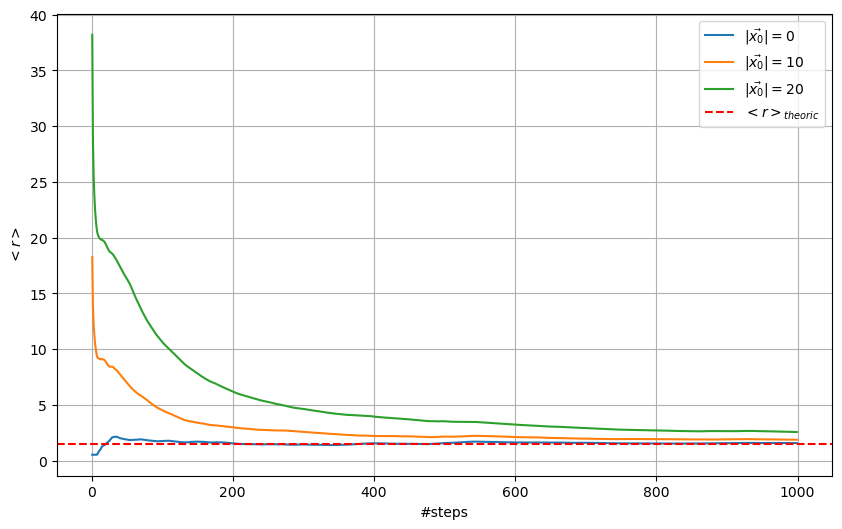

In [12]:
plot_transient()

**Figure 1** – Progressive averages of $\langle r \rangle$ obtained from Metropolis sampling of the $1s$ orbital, starting from three different initial positions: $\lvert \vec{x}_0 \rvert = 0$, $10\,a_0$ and $20\,a_0$. The red dashed line indicates the theoretical expectation value $\langle r \rangle_{1s} = \tfrac{3}{2}a_0$. Simulations initialized closer to the maximum of the probability density equilibrate almost immediately, while those starting farther from the origin display a longer transient before converging to the expected value.



#### Data blocking

As usual, the data are analyzed with the **blocking method**:  
- The total number of steps is $M=10^6$,  
- The data are partitioned into $100$ blocks. 

The choice of the block length $L = M/N$ is crucial: it must be large enough so that the values of different blocks can be considered approximately **uncorrelated**.  
In practice, $L$ should exceed several times the **autocorrelation time** of the Markov chain.  



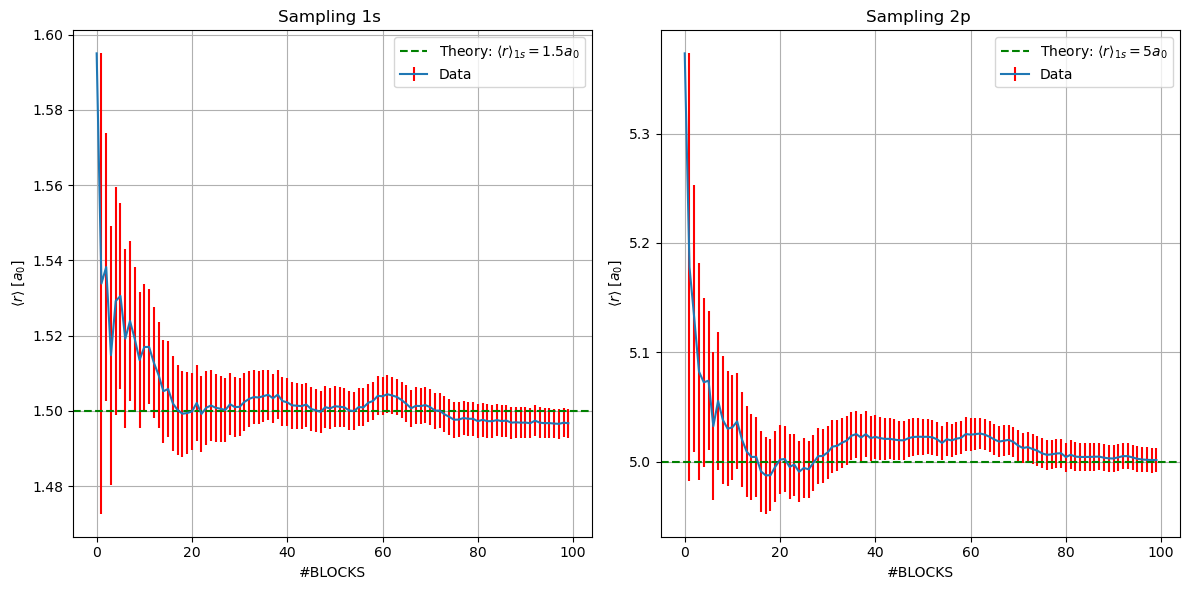

In [28]:
plot('uniforme')

**Figure 2** – Estimates of $\langle r \rangle$ obtained with the Metropolis algorithm using a **uniform transition probability**.  
Left: sampling of the $1s$ orbital, compared with the theoretical value $\langle r \rangle_{1s} = 1.5\,a_0$.  
Right: sampling of the $2p$ orbital, compared with the theoretical value $\langle r \rangle_{2p} = 5\,a_0$.  
The blue lines represent the progressive block averages, the red error bars show the statistical uncertainties from the blocking method, and the green dashed lines indicate the exact theoretical expectations.


The results of Figure 2 confirm the correctness of both the Metropolis sampling and the data blocking analysis.  
In fact, the progressive averages converge rapidly to the exact theoretical values within the estimated statistical uncertainties.  



The sampled coordinates have been written to file and then used to produce the scatter plots shown in the next figure.  
These plots provide a direct visualization of the probability distributions in 3D space, allowing us to compare the spatial structure of the $1s$ and $2p$ orbitals generated by the Metropolis sampling.


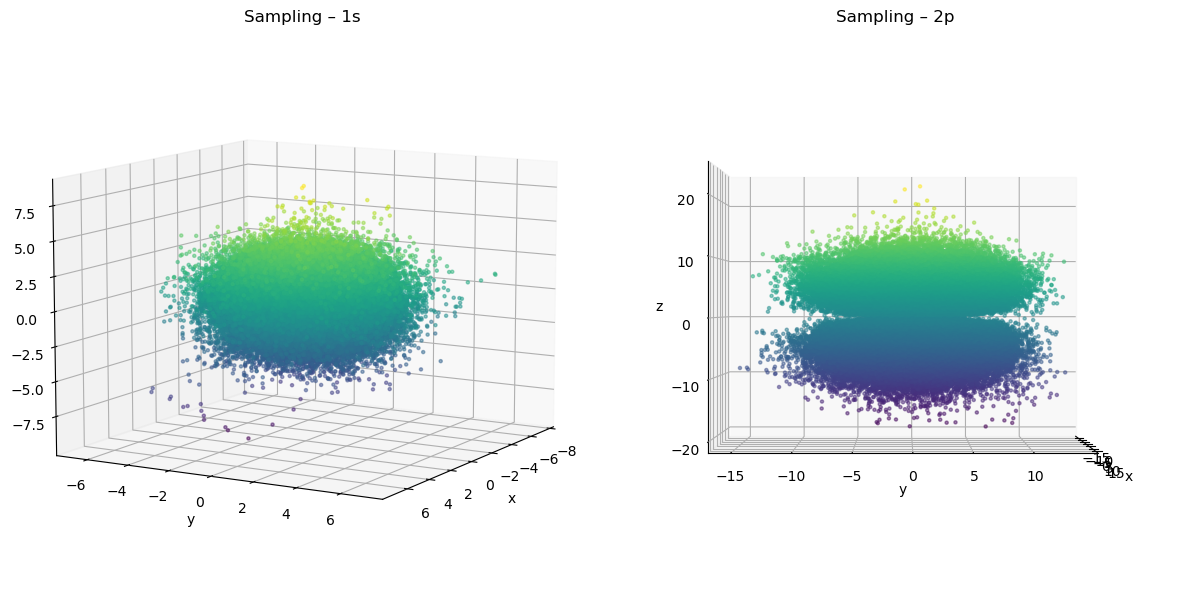

In [36]:
plot_distributions('uniforme')

**Figure 3** – Three-dimensional visualization of the sampled coordinates for the $1s$ (left) and $2p$ (right) hydrogen orbitals using the Metropolis algorithm with a uniform transition probability.  
The spherical symmetry of the $1s$ distribution and the nodal plane characteristic of the $2p$ orbital are clearly reproduced.


#### Gaussian transition probability

The sampling procedure is identical to the uniform case, except for the choice of the transition probability.  
Here the Metropolis algorithm employs a **Gaussian transition**  
$$
T(\vec{x}|\vec{y}) = \frac{1}{(2\pi\sigma^2)^{3/2}}
\exp\!\left(-\frac{|\vec{x}-\vec{y}|^2}{2\sigma^2}\right),
$$
where the step of the random walk is controlled by the standard deviation $\sigma$ of the Gaussian distribution.  

In practice, the Gaussian transition is implemented by generating independent 1D Gaussian displacements for each coordinate $(x,y,z)$ with the same standard deviation $\sigma$.  
This is equivalent to sampling from the 3D isotropic Gaussian distribution written above.
As before, the Metropolis's step is tuned to obtain an acceptance ratio close to 50%, ensuring an efficient sampling of the $1s$ and $2p$ orbitals.

- 1s  $ \sigma=0.75 a_0 $ starting position $\vec{x_0}=(0,0,0)$ ,

- 2p  $ \sigma=1.85  a_0$ starting position $\vec{x_0}=(2,2,2)$ .

As before, data blocking is used to estimate the statistical uncertainty of the observables.
- The total number of steps is $M=10^6$,  
- The data are partitioned into $100$ blocks. 


The results obtained with the Gaussian transition probability are statistically indistinguishable from those obtained with the uniform transition probability.  
This agreement is expected: the Metropolis algorithm guarantees convergence to the correct target distribution $|\Psi|^2$ as long as the proposal $T(\vec{x}|\vec{y})$ is ergodic (able to explore the whole configuration space) and satisfies detailed balance.  
Therefore, the specific form of $T$ (uniform or Gaussian) only affects the efficiency of the sampling, but not the final results for $\langle r \rangle$.


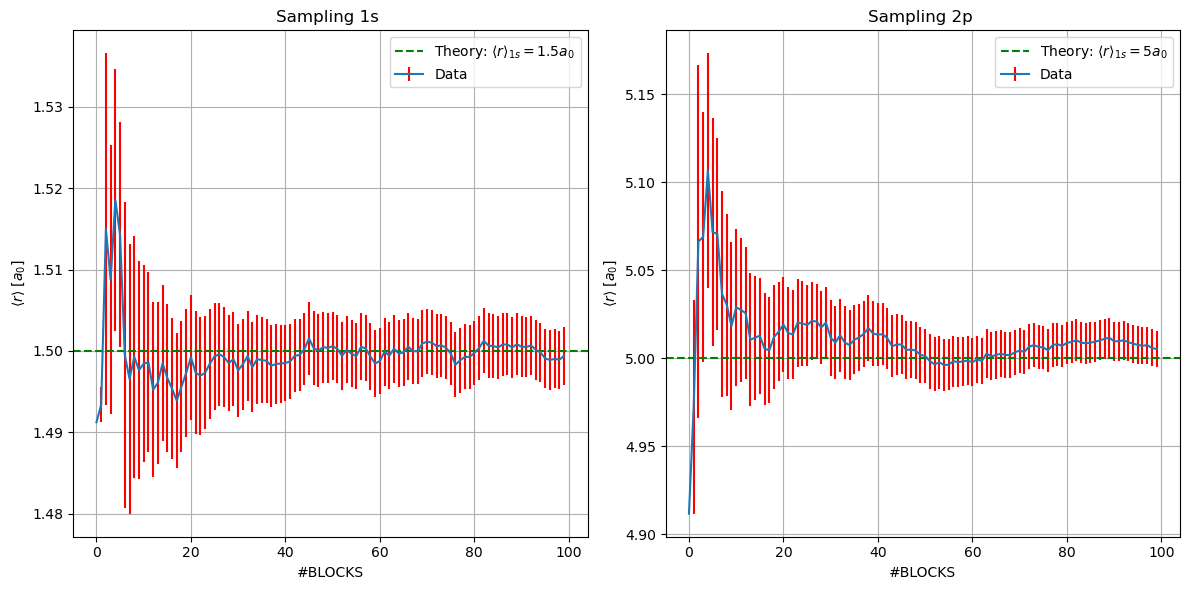

In [37]:
plot('gauss')

**Figure 4** – Estimates of $\langle r \rangle$ obtained with the Metropolis algorithm using a **Gaussian transition probability**.  
Left: sampling of the $1s$ orbital, compared with the theoretical value $\langle r \rangle_{1s} = 1.5\,a_0$.  
Right: sampling of the $2p$ orbital, compared with the theoretical value $\langle r \rangle_{2p} = 5\,a_0$.  
The blue lines represent the progressive block averages, the red error bars show the statistical uncertainties, and the green dashed lines indicate the exact theoretical expectations.


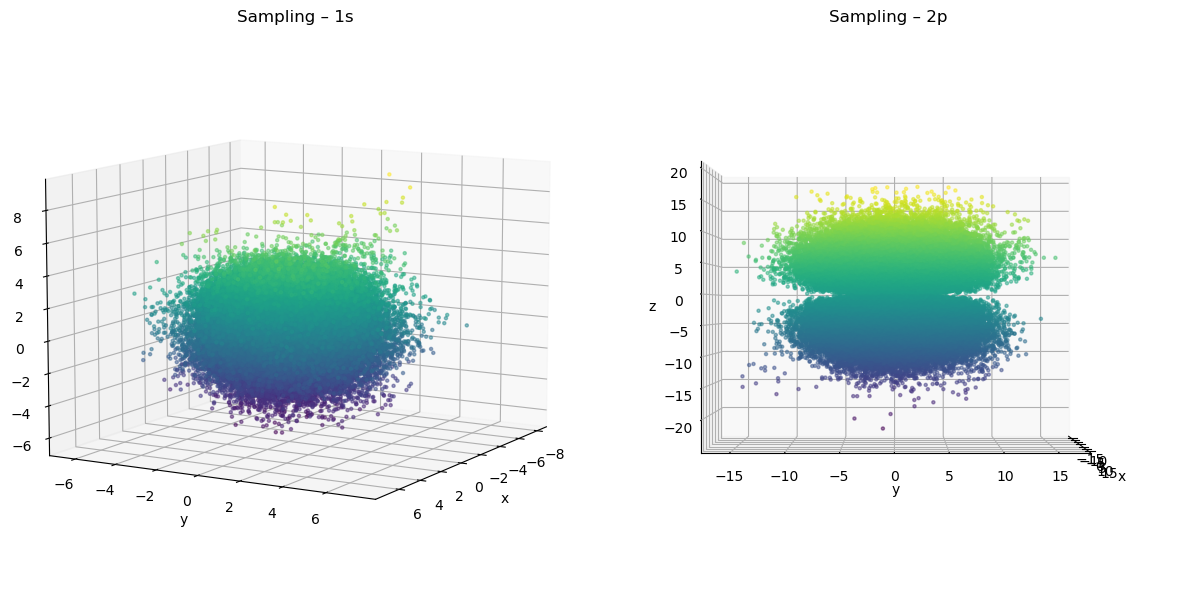

In [39]:
plot_distributions('gauss')

**Figure 5** – Three-dimensional visualization of the sampled coordinates for the $1s$ (left) and $2p$ (right) hydrogen orbitals using the Metropolis algorithm with a Gaussian transition probability.  
The spherical symmetry of the $1s$ orbital and the nodal structure of the $2p$ orbital are correctly reproduced, confirming the equivalence with the uniform transition probability case.
